In [38]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN, AgglomerativeClustering, MeanShift, OPTICS, KMeans

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [39]:
# Leemos los datos del archivo \\C4wadpninv004\ANALISIS II-DGGE\02. SME\GUSTAVO\B200m_CONSIGNADAS.csv
DIR_PATH = '\\\\C4wadpninv004\\ANALISIS II-DGGE\\02. SME\\GUSTAVO\\'
# DIR_PATH = '..\\data\\'
FILE_PATH = DIR_PATH + 'B200m_CONSIGNADAS-v3.csv'
data = pd.read_csv(FILE_PATH, sep=',', encoding='latin-1')
data_cp = data.copy()
data_cp

,id,latitud,longitud,sector,tipo,C01-BANCOS,C05-CENTRALES CAMIONERAS,C06-CENTROS COMERCIALES,C09-CUARTELES DE LA POLICÍA AUXILIAR,C10-CUARTELES PBI,...,C62-OXXO,C67-CENTROS PILARES,C72-ACCESOS METRO,C73-ATRACTIVOS TURISTICOS,C75-FONOTECAS,C76-FOTOTECA,C77-GALERIAS,C78-ZONAS ARQUEOLOGICAS,C81-ESTACIONES DE CABLEBUS,C82-ALCALDIAS
0,1,19.435283,-99.147152,ALAMEDA,9m,25,0,1,0,0,...,4,0,1,3,0,0,2,0,0,0
1,2,19.435098,-99.145820,ALAMEDA,9m,27,0,1,0,0,...,1,0,0,4,0,0,1,0,0,0
2,3,19.434573,-99.143858,ALAMEDA,9m,15,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,4,19.434374,-99.142704,ALAMEDA,9m,16,0,1,0,0,...,2,0,1,2,0,0,1,0,0,0
4,5,19.434242,-99.141880,ALAMEDA,9m,13,0,1,0,0,...,2,0,2,3,0,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,12318,19.435075,-99.119716,CONGRESO,9m,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
442,12578,19.439129,-99.139482,CENTRO,9m,0,0,0,0,0,...,1,0,1,1,0,0,0,0,0,0
443,13795,19.436069,-99.121176,CONGRESO,9m,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
444,16948,19.434749,-99.144808,ALAMEDA,9m,21,0,0,0,0,...,1,0,0,2,0,0,0,0,0,0


In [40]:
# AGRUPACIONES: Los siguientes agrupaciones son para unir las columnas de la base de datos y sumar sus valores
agrupaciones = [['C09-CUARTELES DE LA POLICÍA AUXILIAR','C10-CUARTELES PBI','C11-CUARTELES PGJ','C16-JUZGADOS CIVILES Y PENALES','C20-MINISTERIOR PUBLICOS','C21-MODULOS SSP',],	# P01 - Seguridad

['C05-CENTRALES CAMIONERAS','C19-METROBUS','C31-TREN LIGERO','C42-TROLEBUS','C43-TURIBUS','C72-ACCESOS METRO','C81-ESTACIONES DE CABLEBUS',],										# P02 - Transporte

['C06-CENTROS COMERCIALES','C38-MERCADOS PUBLICOS','C49-TIENDAS DEPARTAMENTALES','C53-CINES','C62-OXXO',],#'C46-ESTABLECIMIENTOS MERCANTILES',],									# P03 - Comercio

['C22-MONUMENTOS HISTORICOS', 'C57-EVENTOS MASIVOS', 'C73-ATRACTIVOS TURISTICOS', 'C78-ZONAS ARQUEOLOGICAS',],																		# P04 - Turismo

['C58-CASAS Y CENTROS DE CULTURA','C59-MUSEOS Y TEATROS','C75-FONOTECAS','C76-FOTOTECA','C77-GALERIAS', 'C26-PLAZAS Y PARQUES',],													# P05 - Cultura

['C23-NOTARIAS','C24-OFICINAS DE GOBIERNO','C27-RECLUSORIOS','C30-TESORERIAS','C82-ALCALDIAS', 'C01-BANCOS'],																		# P06 - Gobierno

['C15-HOSPITALES','C45-CENTROS DE SALUD Y CLINICAS',],																																# P07 - Hospitales

['C44-GUARDERIAS', 'C67-CENTROS PILARES', 'C13-EDUCACION',],#'C13-CAM', 'C13-CPARA EL TRABAJO', 'C13_PREESC', 'C13_PRIM', 'C13_SEC', 'C13_BACH', 'C13_SUP',],						# P08 - Escuelas

['C33-IGLESIAS Y TEMPLOS',],																																						# P09 - Iglesias

['C51-EDIFICIOS',],]																																								# P10 - Edificios

# Cada nueva columna es la suma de las columnas que se encuentran en la lista de agrupaciones con nombre GRUPO-k
for i in range(len(agrupaciones)):
	data['P.Interes-'+str(i+1)] = data[agrupaciones[i]].sum(axis=1)
	# Eliminamos las columnas que ya no se van a utilizar
	data = data.drop(agrupaciones[i], axis=1)

print(data.columns)
# Seleccionamos las columnas que nos interesan.
# X = data.filter(regex='^P.Interes-\d+')
X = data.filter(regex='^P.Interes-\d+')

# IMprimir car y std de las columnas
print(X.describe().T[['mean', 'std']])

X

Index(['id', 'latitud', 'longitud', 'sector', 'tipo',
       'C46-ESTABLECIMIENTOS MERCANTILES', 'P.Interes-1', 'P.Interes-2',
       'P.Interes-3', 'P.Interes-4', 'P.Interes-5', 'P.Interes-6',
       'P.Interes-7', 'P.Interes-8', 'P.Interes-9', 'P.Interes-10'],
      dtype='object')
                  mean       std
P.Interes-1   0.206278  0.616300
P.Interes-2   2.114350  2.680419
P.Interes-3   1.991031  2.171296
P.Interes-4   1.585202  3.184323
P.Interes-5   3.130045  4.146328
P.Interes-6   5.634529  8.080693
P.Interes-7   0.221973  0.452272
P.Interes-8   1.598655  1.505913
P.Interes-9   0.547085  0.703939
P.Interes-10  2.275785  7.740029


,P.Interes-1,P.Interes-2,P.Interes-3,P.Interes-4,P.Interes-5,P.Interes-6,P.Interes-7,P.Interes-8,P.Interes-9,P.Interes-10
0,1,4,9,14,7,25,0,3,0,0
1,1,2,5,12,6,27,0,3,0,0
2,1,1,4,11,4,16,0,1,1,0
3,0,2,7,8,4,17,0,1,1,0
4,0,4,8,8,7,14,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...
441,0,3,1,0,0,0,0,0,0,0
442,0,6,1,1,4,0,1,3,1,0
443,0,2,0,0,0,0,0,3,0,0
444,1,1,3,13,4,22,0,1,1,0


In [41]:
# Creamos una instancia del objeto PCA y DBSCAN
pca_pipe = make_pipeline(StandardScaler(with_std=True, with_mean=True), PCA(), KMeans(n_clusters=5, random_state=0))
pca_pipe.fit(X)

# Obtenemos el modelo
pca = pca_pipe.named_steps['pca']
kmeans = pca_pipe.named_steps['kmeans']

labels = kmeans.labels_

0 85
1 249
2 58
3 22
4 32


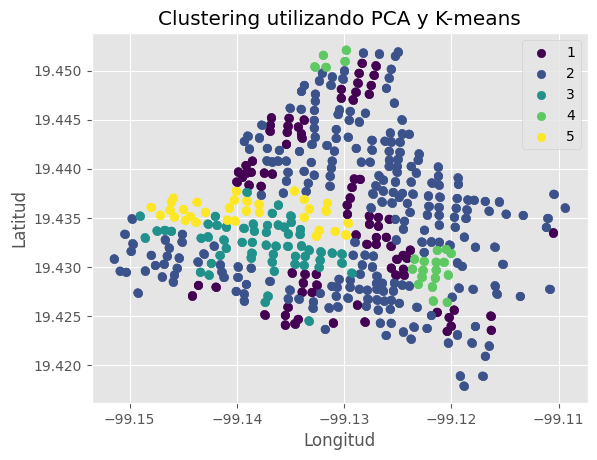

In [42]:
geo = plt.scatter(data_cp['longitud'], data_cp['latitud'], c=labels, cmap='viridis')

colors = plt.get_cmap('viridis')(np.linspace(0,1,len(np.unique(labels))))


for label in np.unique(labels):
    data_ = data_cp[labels==label]
    print(label, len(data_))
    plt.scatter(data_['longitud'], data_['latitud'], c=colors[label], label=label+1)

plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Clustering utilizando PCA y K-means')
plt.legend()
plt.show()


# Ponerle el mapa de los sectores y las calles a ambos mapas n_compontes = 3 y n_components = 10

# aplicarle  I de mooran y lisa (para cada una camaras en relacion a los grupos que se formaron
# 
# Excel de la estandarizacion de los puntos de interes)

In [43]:
data_cp['Cluster'] = labels
data_cp[['id', 'Cluster', 'longitud', 'latitud']]\
    .to_excel(DIR_PATH + 'CAMARAS_CON_CLUSTER-PC10.xlsx', index=False)


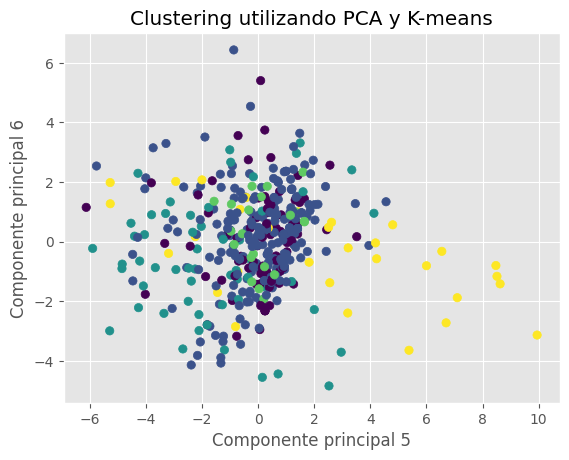

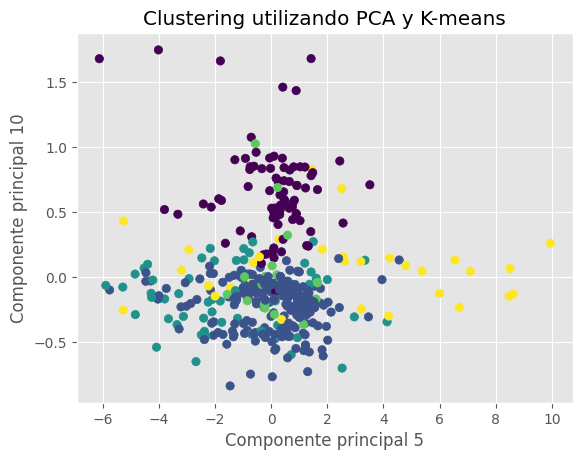

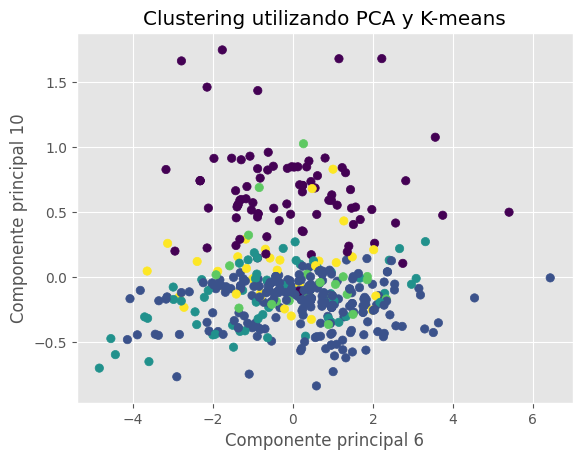

In [44]:

data_pca = pca.fit_transform(X)

# plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis')
# plt.xlabel('Componente principal 1')
# plt.ylabel('Componente principal 2')
# plt.title('Clustering utilizando PCA y K-means')
# plt.show()

# Create for to show components dot graph each other
for i in range(len(pca.components_)):
	for j in range(i,len(pca.components_)):
		# if i+1 not in [5,6,10] or j+1 not in [5,6,10]:
		# 	continue
		if i == j:
			continue
		plt.scatter(data_pca[:,i], data_pca[:,j], c=labels, cmap='viridis')
		plt.xlabel('Componente principal '+str(i+1))
		plt.ylabel('Componente principal '+str(j+1))
		plt.title('Clustering utilizando PCA y K-means')
		plt.show()


In [45]:
# Cuardar los datos agrupados en un archivo csv
data_cp['Cluster'] = labels
data['Cluster'] = labels
data_cp.to_csv(DIR_PATH + 'B200m_CONSIGNADAS_CLUSTER.csv', index=False)

In [46]:
print(data.columns)

Index(['id', 'latitud', 'longitud', 'sector', 'tipo',
       'C46-ESTABLECIMIENTOS MERCANTILES', 'P.Interes-1', 'P.Interes-2',
       'P.Interes-3', 'P.Interes-4', 'P.Interes-5', 'P.Interes-6',
       'P.Interes-7', 'P.Interes-8', 'P.Interes-9', 'P.Interes-10', 'Cluster'],
      dtype='object')


In [47]:
# Create loop to get mean, variance and standard deviation of each cluster and store into a dataframe
drop_columns = ['id', 'latitud', 'longitud', 'sector', 'tipo', 'C46-ESTABLECIMIENTOS MERCANTILES']
data = data.drop(drop_columns, axis=1)
columns = [(op, column) for op in ['median', 'var'] for column in data.columns]
# columns = [(op, column) for op in ['mean', 'var', 'std'] for column in data.columns]
# columns = [(op, column) for op in ['var', 'std'] for column in data.columns]
# Drop any pair with (_, Cluster)
columns = [column for column in columns if column[1] != 'Cluster']
# create dataframe 
df = pd.DataFrame(columns=pd.MultiIndex.from_tuples(columns))
for i in range(len(np.unique(labels))):
	data_ = data[data['Cluster'] == i]

	# print(data_.columns)
	# Drop Cluster column
	data_ = data_.drop('Cluster', axis=1)

	mean = data_.median(axis=0)
	var = data_.var(axis=0)
	std = data_.std(axis=0)

	# values = np.concatenate((var.values, std.values), axis=0)
	# values = np.concatenate((mean.values, var.values, std.values), axis=0)
	values = np.concatenate((mean.values, var.values), axis=0)

	# Append values to df
	# df = df.append(pd.DataFrame(values, columns=headers), ignore_index=True)
	df.loc[i] = values




df.index.name = 'Cluster'
df.to_excel(DIR_PATH + 'B200m_CONSIGNADAS_CLUSTER_pipipi.xlsx')
df

median                                                  \
        P.Interes-1 P.Interes-2 P.Interes-3 P.Interes-4 P.Interes-5   
Cluster                                                               
0               0.0         0.0         1.0         0.0         2.0   
1               0.0         1.0         1.0         0.0         1.0   
2               0.0         2.0         5.0         2.0         7.0   
3               2.0         1.5         0.0         0.0         1.0   
4               0.0         4.5         3.0        10.0        12.0   

                                                                      \
        P.Interes-6 P.Interes-7 P.Interes-8 P.Interes-9 P.Interes-10   
Cluster                                                                
0               1.0         1.0         2.0         1.0          0.0   
1               0.0         0.0         1.0         0.0          0.0   
2              18.5         0.0         0.0         1.0          0.0   
3               0.0         0.0         0.0         1.0         30.5   
4              14.0         0.0         1.0         1.0          0.0   

                var                                                  \
        P.Interes-1 P.Interes-2 P.Interes-3 P.Interes-4 P.Interes-5   
Cluster                                                               
0          0.095798    4.800280    2.432773    1.688235    4.717927   
1          0.103576    4.204852    2.060371    1.234875    5.421395   
2          0.049909    6.982456    4.990018    5.759226   13.895039   
3          1.517316    4.521645    0.545455    1.084416    0.632035   
4          0.176411   24.318548    6.129032   20.564516   39.660282   

                                                                      
        P.Interes-6 P.Interes-7 P.Interes-8 P.Interes-9 P.Interes-10  
Cluster                                                               
0         26.227451    0.076471    2.404202    0.757143    10.265546  
1         14.494203    0.000000    2.387323    0.238632    15.225936  
2         86.686025    0.033878    0.673926    0.585602     0.844828  
3          0.303030    0.123377    2.140693    0.348485   360.694805  
4         51.641129    0.060484    1.692540    0.458669     0.000000

In [48]:
pca_df = pd.DataFrame(
    data    = pca.components_,
    columns = X.columns,
    index   = [f'PC{x+1}' for x in range(len(pca.components_))]
)
pca_df

,P.Interes-1,P.Interes-2,P.Interes-3,P.Interes-4,P.Interes-5,P.Interes-6,P.Interes-7,P.Interes-8,P.Interes-9,P.Interes-10
PC1,-0.019618,0.074081,0.148517,0.193608,0.257819,0.794840,-0.004056,-0.001839,0.019052,-0.485759
PC2,0.036383,0.034409,0.073992,0.102367,0.099686,0.458286,-0.006934,-0.050262,0.019173,0.870995
PC3,0.003315,0.297161,-0.080903,0.449401,0.760742,-0.345430,-0.003237,0.051538,0.030491,0.039140
PC4,0.020877,0.774989,0.086209,0.358662,-0.508977,-0.018831,-0.012390,-0.048359,-0.027447,-0.015089
PC5,0.029596,-0.484374,-0.340710,0.740122,-0.283761,0.017454,-0.001613,0.135686,-0.036567,-0.008228
PC6,-0.002452,0.257944,-0.741131,-0.265240,0.024779,0.182759,-0.008515,0.527686,-0.032104,0.016138
PC7,0.001757,-0.054829,0.539217,0.046941,-0.037672,-0.068114,0.060509,0.832251,-0.009924,0.039646
PC8,-0.062642,0.005181,-0.040854,0.012142,-0.052494,-0.004394,0.308562,0.012608,0.946607,-0.004879
PC9,0.996230,-0.001936,0.004088,-0.030888,0.014422,-0.000069,-0.002811,0.000496,0.068005,-0.041360
PC10,0.023697,0.014995,-0.026287,-0.000363,0.017031,0.012761,0.949114,-0.053022,-0.307296,0.003291


In [49]:
pca_df.to_excel(DIR_PATH + 'B200m_CONSIGNADAS_CLUSTER_PCA_pipipi.xlsx')

In [50]:
# Obtencion de los residuales del pca
residuales = pca_pipe.named_steps['standardscaler'].transform(X)
# Guardar en un excel
residuales = pd.DataFrame(residuales)
residuales.to_excel(DIR_PATH + 'residuales.xlsx')

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.4919405  0.31740821 0.09322991 0.04110907 0.02451372 0.01559298
 0.01093244 0.00266658 0.00161488 0.00099172]


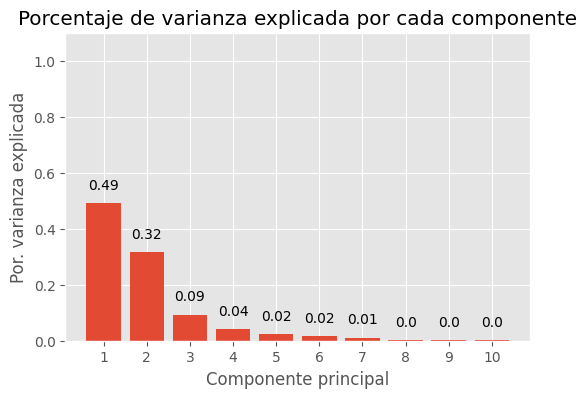

In [53]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(pca.n_components_) + 1,
    height = pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(X.columns)) + 1, pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.4919405  0.8093487  0.90257861 0.94368768 0.9682014  0.98379437
 0.99472681 0.9973934  0.99900828 1.        ]


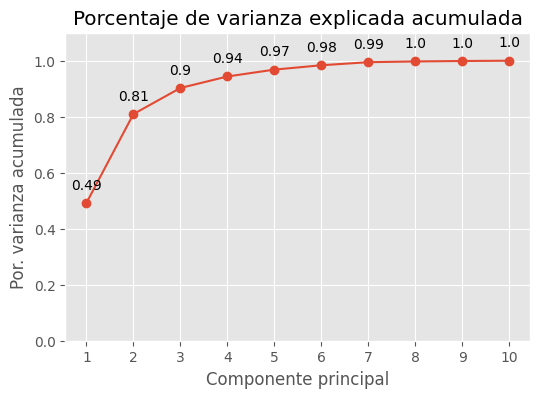

In [55]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(pca.n_components_) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(X.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

In [56]:
# Realizar el clustering con los componentes principales
# ==============================================================================
# Seleccionamos el número de componentes que vamos a utilizar
# ------------------------------------------------------------------------------
n_componentes = 3

# Creamos una instancia del objeto PCA
pca_pipe = make_pipeline(StandardScaler(), PCA(n_components=n_componentes))

# Ajustamos el modelo
pca_pipe.fit(X)

# Obtenemos los datos transformados
pca_datos = pca_pipe.transform(X)

# Creamos un dataframe con los datos transformados
pca_df = pd.DataFrame(
    data    = pca_datos,
	columns = [f'PC{x+1}' for x in range(n_componentes)]
	
)

# Creamos un dataframe con los datos transformados y la variable objetivo
pca_df = pd.concat([pca_df, y], axis=1)
pca_df.head()

# Grafico de dispercion de los componentes principales
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.scatter(
    x = pca_df['PC1'],
    y = pca_df['PC2'],
    s = 1,
    alpha = 0.5
)
ax.set_title('Residuales')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.grid();


TypeError: cannot concatenate object of type '<class 'numpy.float64'>'; only Series and DataFrame objs are valid

# Ayuda


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Leemos los datos del archivo \\C4wadpninv004\ANALISIS II-DGGE\02. SME\GUSTAVO\B200m_CONSIGNADAS.csv
DIR_PATH = '\\\\C4wadpninv004\\ANALISIS II-DGGE\\02. SME\\GUSTAVO\\'
FILE_PATH = DIR_PATH + 'B200m_CONSIGNADAS.csv'
data = pd.read_csv(FILE_PATH, sep=',', encoding='latin-1')

In [ ]:

# AGRUPACIONES: Los siguientes agrupaciones son para unir las columnas de la base de datos y sumar sus valores
agrupaciones = [['C09-CUARTELES DE LA POLICÍA AUXILIAR','C10-CUARTELES PBI','C11-CUARTELES PGJ','C16-JUZGADOS CIVILES Y PENALES','C20-MINISTERIOR PUBLICOS','C21-MODULOS SSP',],

['C05-CENTRALES CAMIONERAS','C19-METROBUS','C31-TREN LIGERO','C42-TROLEBUS','C43-TURIBUS','C72-ACCESOS METRO','C81-ESTACIONES DE CABLEBUS',],

['C06-CENTROS COMERCIALES','C38-MERCADOS PUBLICOS','C46-ESTABLECIMIENTOS MERCANTILES','C49-TIENDAS DEPARTAMENTALES','C53-CINES','C62-OXXO',],

['C22-MONUMENTOS HISTORICOS', 'C57-EVENTOS MASIVOS', 'C73-ATRACTIVOS TURISTICOS', 'C78-ZONAS ARQUEOLOGICAS',],

['C58-CASAS Y CENTROS DE CULTURA','C59-MUSEOS Y TEATROS','C75-FONOTECAS','C76-FOTOTECA','C77-GALERIAS', ],#'C26-PARQUES Y RECREACION',],

['C23-NOTARIAS','C24-OFICINAS DE GOBIERNO','C27-RECLUSORIOS','C30-TESORERIAS','C82-ALCALDIAS', ],#'C01-BANCOS Y CAJEROS'],

['C15-HOSPITALES','C45-CENTROS DE SALUD Y CLINICAS',],

['C44-GUARDERIAS', 'C67-CENTROS PILARES', ],#'C13-EDUCACIÓN',],

['C33-IGLESIAS Y TEMPLOS',],

['C51-EDIFICIOS',],]

In [ ]:

# Cada nueva columna es la suma de las columnas que se encuentran en la lista de agrupaciones con nombre GRUPO-k
for i in range(len(agrupaciones)):
	data['GRUPO-'+str(i+1)] = data[agrupaciones[i]].sum(axis=1)
	# Eliminamos las columnas que ya no se van a utilizar
	data = data.drop(agrupaciones[i], axis=1)

	
data = data.filter(regex='^GRUPO-\d+')

# Normalizar los datos
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data)

# Aplicar PCA
pca = PCA(n_components=7)
data_pca = pca.fit_transform(data_normalized)

# Aplicar K-means
k = 3
kmeans = KMeans()#(n_clusters=k)
kmeans.fit(data_pca)

# Asignar etiquetas de cluster y visualizar
labels = kmeans.labels_
labels

In [ ]:
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('Clustering utilizando PCA y K-means')
plt.show()


plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('Clustering utilizando PCA y K-means')
plt.show()


In [ ]:
len(kmeans.labels_)
# Separar los datos en grupos
data['CLUSTER'] = kmeans.labels_
data.groupby('CLUSTER').size()